## NFL Analysis
Chris Goodwin 
DSC680

The first step in our analysis will be taking a look at QB data, and trying to determine which factors contribute most heavily to wins. Our first step is to read in the data file.

In [1]:
import pandas as pd
file = "C:\\Users\\goodw\\Downloads\\Game_Logs_Quarterback.csv\\Game_Logs_Quarterback.csv"
qbs = pd.read_csv(file)
qbs.head()

Player Id              Name Position  Year          Season  \
0  jaredzabransky/2495791  Zabransky, Jared      NaN  2007       Preseason   
1  jaredzabransky/2495791  Zabransky, Jared      NaN  2007       Preseason   
2  jaredzabransky/2495791  Zabransky, Jared      NaN  2007       Preseason   
3  jaredzabransky/2495791  Zabransky, Jared      NaN  2007       Preseason   
4      billdemory/2512778      Demory, Bill      NaN  1974  Regular Season   

   Week Game Date Home or Away Opponent Outcome  ... Ints  Sacks  \
0     1     08/11         Home      CHI       L  ...   --     --   
1     2     08/18         Away      ARI       W  ...    0      0   
2     3     08/25         Home      DAL       W  ...   --     --   
3     4     08/30         Away       TB       L  ...    1      2   
4     1     09/15         Away       KC       L  ...   --     --   

  Sacked Yards Lost Passer Rating Rushing Attempts Rushing Yards  \
0                --           0.0               --            --   
1                 0          46.9               --            --   
2                --           0.0               --            --   
3                13          50.8                2            17   
4                --           0.0               --            --   

  Yards Per Carry Rushing TDs Fumbles Fumbles Lost  
0              --          --      --           --  
1              --          --      --           --  
2              --          --      --           --  
3             8.5           0      --           --  
4              --          --      --           --  

[5 rows x 29 columns]

In [2]:
qbs.shape

(40247, 29)

Eliminate Preseason games

In [3]:
qbs = qbs[qbs['Season'] != 'Preseason']
qbs.shape

(36383, 29)

Eliminate games with null number of pass attempts

In [4]:
qbs = qbs[qbs['Passes Attempted'] != '--']
qbs.shape

(17193, 29)

In [5]:
qbs.columns

Index(['Player Id', 'Name', 'Position', 'Year', 'Season', 'Week', 'Game Date',
       'Home or Away', 'Opponent', 'Outcome', 'Score', 'Games Played',
       'Games Started', 'Passes Completed', 'Passes Attempted',
       'Completion Percentage', 'Passing Yards', 'Passing Yards Per Attempt',
       'TD Passes', 'Ints', 'Sacks', 'Sacked Yards Lost', 'Passer Rating',
       'Rushing Attempts', 'Rushing Yards', 'Yards Per Carry', 'Rushing TDs',
       'Fumbles', 'Fumbles Lost'],
      dtype='object')

Replace null values with zeroes

In [10]:
qbs = qbs.replace('--', 0)

Convert numeric columns to floats

In [11]:
float_cols = ['Passes Completed', 'Passes Attempted',
       'Completion Percentage', 'Passing Yards', 'Passing Yards Per Attempt',
       'TD Passes', 'Ints', 'Sacks', 'Sacked Yards Lost', 'Passer Rating',
       'Rushing Attempts', 'Rushing Yards', 'Yards Per Carry', 'Rushing TDs',
       'Fumbles', 'Fumbles Lost']

In [12]:
for col in float_cols:
    qbs[col] = qbs[col].astype('float')

In [13]:
qbs.head()

Player Id          Name Position  Year          Season  Week  \
19  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     4   
20  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     5   
21  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     6   
22  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     7   
24  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     9   

   Game Date Home or Away Opponent Outcome  ... Ints  Sacks Sacked Yards Lost  \
19     10/07         Away      MIA       L  ...  2.0    1.0               4.0   
20     10/14         Away       NE       W  ...  0.0    1.0              11.0   
21     10/21         Away      PIT       L  ...  3.0    4.0              38.0   
22     10/28         Home      DEN       L  ...  2.0    0.0               0.0   
24     11/11         Home       NE       W  ...  1.0    1.0               9.0   

    Passer Rating  Rushing Attempts  Rushing Yards  Yards Per Carry  \
19            8.3               0.0            0.0              0.0   
20           39.6               2.0            0.0              0.0   
21           41.4               2.0           -1.0             -0.5   
22            0.0               0.0            0.0              0.0   
24           59.4               0.0            0.0              0.0   

    Rushing TDs  Fumbles  Fumbles Lost  
19          0.0      0.0           0.0  
20          0.0      0.0           0.0  
21          0.0      0.0           0.0  
22          0.0      0.0           0.0  
24          0.0      0.0           0.0  

[5 rows x 29 columns]

Create team points variable

In [14]:
qbs['Team Points'] = qbs['Score'].str.split(" ").str.get(0)
qbs['Team Points'] = qbs['Team Points'].astype('int')
qbs.head()

Player Id          Name Position  Year          Season  Week  \
19  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     4   
20  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     5   
21  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     6   
22  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     7   
24  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     9   

   Game Date Home or Away Opponent Outcome  ... Sacks  Sacked Yards Lost  \
19     10/07         Away      MIA       L  ...   1.0                4.0   
20     10/14         Away       NE       W  ...   1.0               11.0   
21     10/21         Away      PIT       L  ...   4.0               38.0   
22     10/28         Home      DEN       L  ...   0.0                0.0   
24     11/11         Home       NE       W  ...   1.0                9.0   

   Passer Rating  Rushing Attempts  Rushing Yards  Yards Per Carry  \
19           8.3               0.0            0.0              0.0   
20          39.6               2.0            0.0              0.0   
21          41.4               2.0           -1.0             -0.5   
22           0.0               0.0            0.0              0.0   
24          59.4               0.0            0.0              0.0   

    Rushing TDs  Fumbles  Fumbles Lost  Team Points  
19          0.0      0.0           0.0            3  
20          0.0      0.0           0.0            9  
21          0.0      0.0           0.0           14  
22          0.0      0.0           0.0           28  
24          0.0      0.0           0.0           33  

[5 rows x 30 columns]

Create encoded categorical variables

In [15]:
qbs["Outcome"] = qbs["Outcome"].astype('category')
qbs['outcome_code'] = qbs['Outcome'].cat.codes

In [16]:
qbs["Home or Away"]= qbs["Home or Away"].astype('category')
qbs['hoa_code'] = qbs["Home or Away"].cat.codes

In [17]:
qbs["Opponent"] = qbs["Opponent"].astype('category')
qbs['opponent_code'] = qbs['Opponent'].cat.codes

In [18]:
qbs.head()

Player Id          Name Position  Year          Season  Week  \
19  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     4   
20  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     5   
21  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     6   
22  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     7   
24  billdemory/2512778  Demory, Bill      NaN  1973  Regular Season     9   

   Game Date Home or Away Opponent Outcome  ... Rushing Attempts  \
19     10/07         Away      MIA       L  ...              0.0   
20     10/14         Away       NE       W  ...              2.0   
21     10/21         Away      PIT       L  ...              2.0   
22     10/28         Home      DEN       L  ...              0.0   
24     11/11         Home       NE       W  ...              0.0   

    Rushing Yards Yards Per Carry  Rushing TDs  Fumbles  Fumbles Lost  \
19            0.0             0.0          0.0      0.0           0.0   
20            0.0             0.0          0.0      0.0           0.0   
21           -1.0            -0.5          0.0      0.0           0.0   
22            0.0             0.0          0.0      0.0           0.0   
24            0.0             0.0          0.0      0.0           0.0   

    Team Points  outcome_code  hoa_code  opponent_code  
19            3             0         0             21  
20            9             2         0             23  
21           14             0         0             31  
22           28             0         1             12  
24           33             2         1             23  

[5 rows x 33 columns]

Eliminate ties

In [19]:
qbs = qbs[qbs.outcome_code != 1]

In [20]:
qbs.shape

(17179, 33)

In [21]:
qbs.columns

Index(['Player Id', 'Name', 'Position', 'Year', 'Season', 'Week', 'Game Date',
       'Home or Away', 'Opponent', 'Outcome', 'Score', 'Games Played',
       'Games Started', 'Passes Completed', 'Passes Attempted',
       'Completion Percentage', 'Passing Yards', 'Passing Yards Per Attempt',
       'TD Passes', 'Ints', 'Sacks', 'Sacked Yards Lost', 'Passer Rating',
       'Rushing Attempts', 'Rushing Yards', 'Yards Per Carry', 'Rushing TDs',
       'Fumbles', 'Fumbles Lost', 'Team Points', 'outcome_code', 'hoa_code',
       'opponent_code'],
      dtype='object')

We are left with 17,179 records. We will now create a subset that only includes wins with passers attempting more than 10 passes

In [23]:
wins = qbs[qbs['Outcome'] == 'W']

In [24]:
wins = wins[wins['Passes Attempted'] > 10]

In [25]:
wins.shape

(7111, 33)

We will now look at distributions for some potential key variables of interest. 

Text(0.5, 0.98, 'Quarterback Distributions')

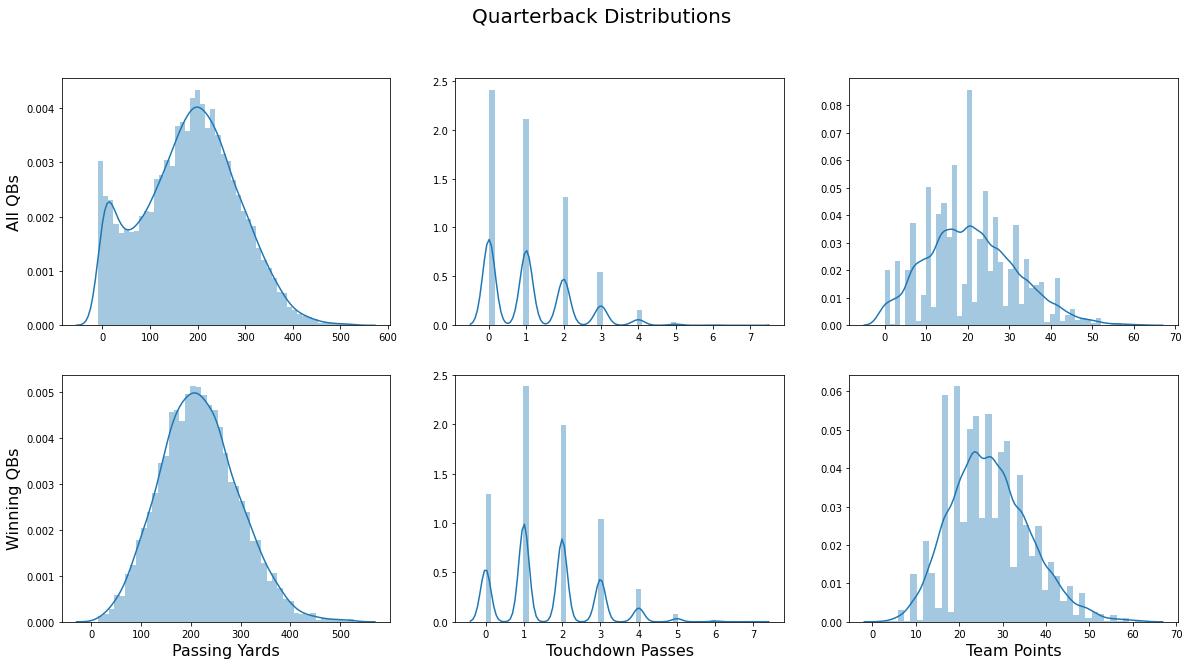

In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

fig = plt.figure(figsize=(20,10)) 
# create figure window
gs = gridspec.GridSpec(2, 3)
# Creates grid 'gs' of a rows and b columns 

ax = plt.subplot(gs[0, 0])
sns.distplot(qbs['Passing Yards'])

ax2 = plt.subplot(gs[0, 1])
sns.distplot(qbs['TD Passes'])

ax3 = plt.subplot(gs[0, 2])
sns.distplot(qbs['Team Points'])


ax4 = plt.subplot(gs[1, 0])
sns.distplot(wins['Passing Yards'])

ax5 = plt.subplot(gs[1, 1])
sns.distplot(wins['TD Passes'])

ax6 = plt.subplot(gs[1, 2])
sns.distplot(wins['Team Points'])

ax.set_ylabel("All QBs", fontsize = 16)
ax.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_ylabel("Winning QBs", fontsize = 16)
ax4.set_xlabel("Passing Yards",fontsize = 16)
ax5.set_xlabel("Touchdown Passes", fontsize = 16)
ax6.set_xlabel("Team Points", fontsize = 16)



fig.add_subplot(ax) #add 'ax' to figure
fig.add_subplot(ax2)
fig.add_subplot(ax3)
fig.add_subplot(ax4)
fig.add_subplot(ax5)
fig.add_subplot(ax6)

fig.suptitle("Quarterback Distributions", fontsize = 20)

Next, we will create pairwise plots and correlation matrices for the numeric values.

In [29]:
qbs_num = qbs.drop(['Player Id', 'Name', 'Position', 'Year', 'Season', 'Week', 'Game Date',
       'Home or Away', 'Opponent', 'Outcome', 'Score', 'Games Played',
       'Games Started'], axis = 1)
               
qbs_num.head()              

Passes Completed  Passes Attempted  Completion Percentage  Passing Yards  \
19               2.0               5.0                   40.0           14.0   
20               1.0               7.0                   14.3           11.0   
21               6.0              15.0                   40.0           84.0   
22               0.0               4.0                    0.0            0.0   
24               3.0               8.0                   37.5           50.0   

    Passing Yards Per Attempt  TD Passes  Ints  Sacks  Sacked Yards Lost  \
19                        2.8        0.0   2.0    1.0                4.0   
20                        1.6        0.0   0.0    1.0               11.0   
21                        5.6        1.0   3.0    4.0               38.0   
22                        0.0        0.0   2.0    0.0                0.0   
24                        6.3        1.0   1.0    1.0                9.0   

    Passer Rating  Rushing Attempts  Rushing Yards  Yards Per Carry  \
19            8.3               0.0            0.0              0.0   
20           39.6               2.0            0.0              0.0   
21           41.4               2.0           -1.0             -0.5   
22            0.0               0.0            0.0              0.0   
24           59.4               0.0            0.0              0.0   

    Rushing TDs  Fumbles  Fumbles Lost  Team Points  outcome_code  hoa_code  \
19          0.0      0.0           0.0            3             0         0   
20          0.0      0.0           0.0            9             2         0   
21          0.0      0.0           0.0           14             0         0   
22          0.0      0.0           0.0           28             0         1   
24          0.0      0.0           0.0           33             2         1   

    opponent_code  
19             21  
20             23  
21             31  
22             12  
24             23

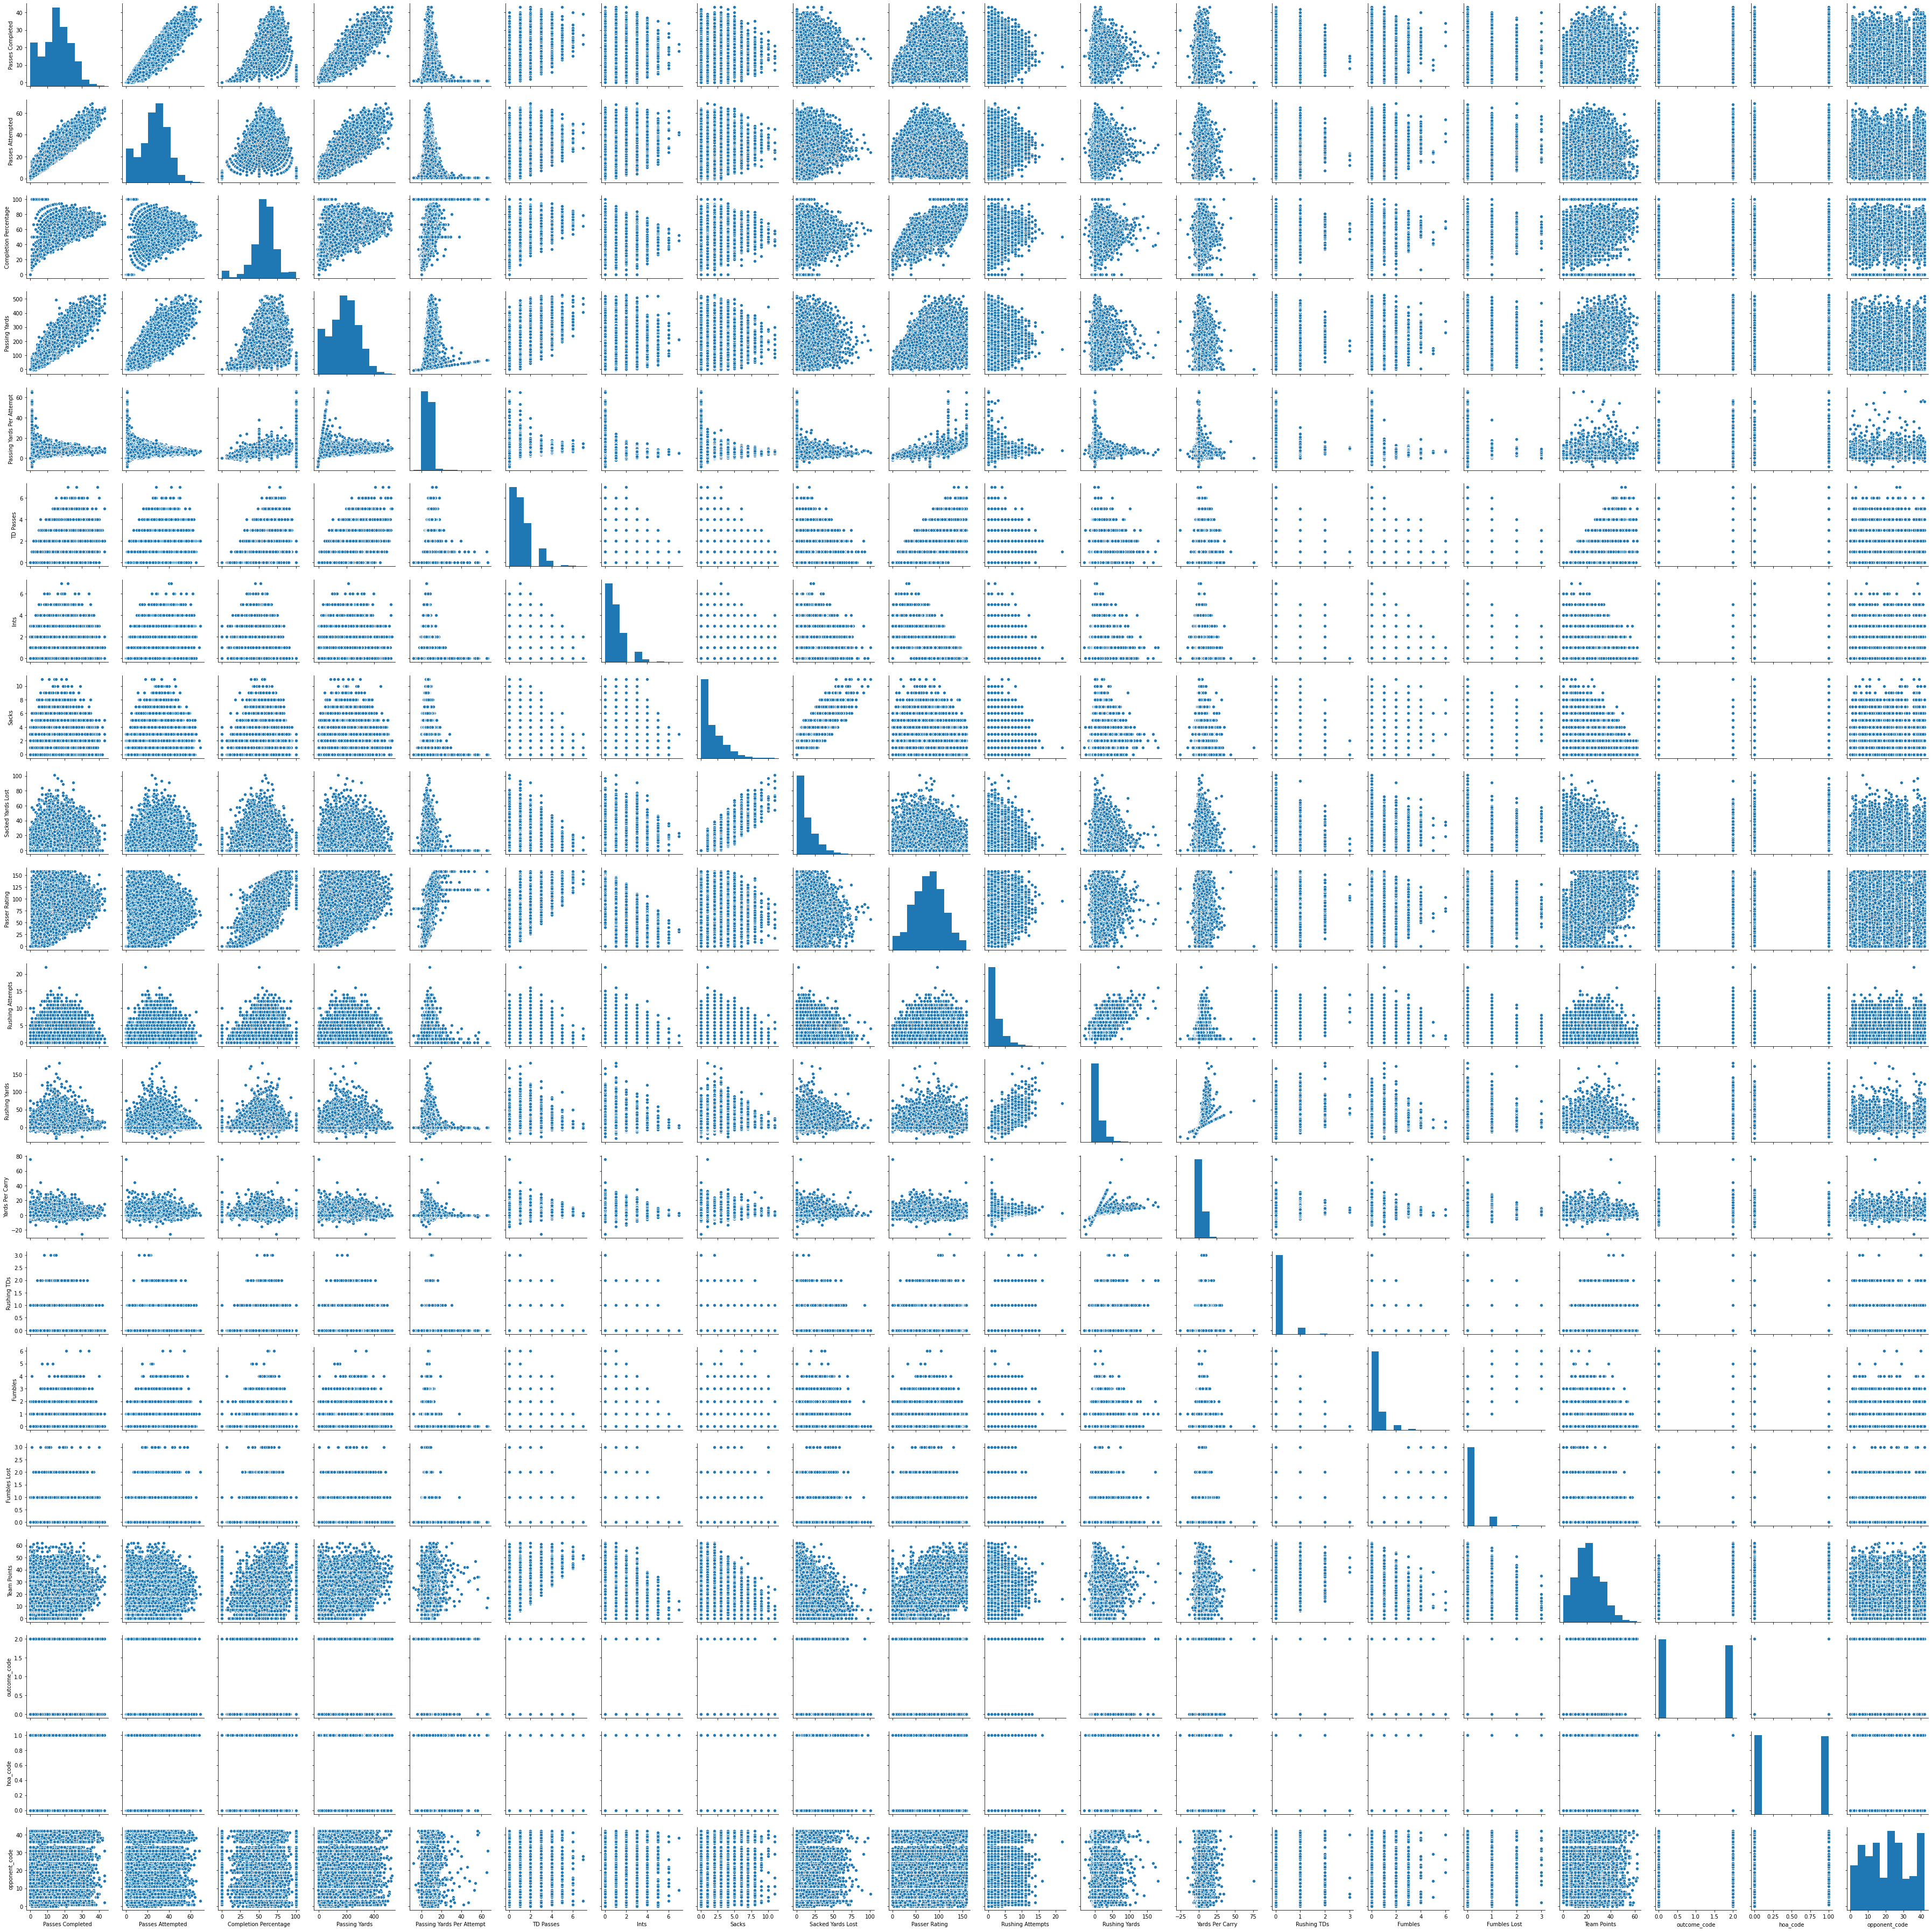

In [30]:
sns.pairplot(qbs_num)

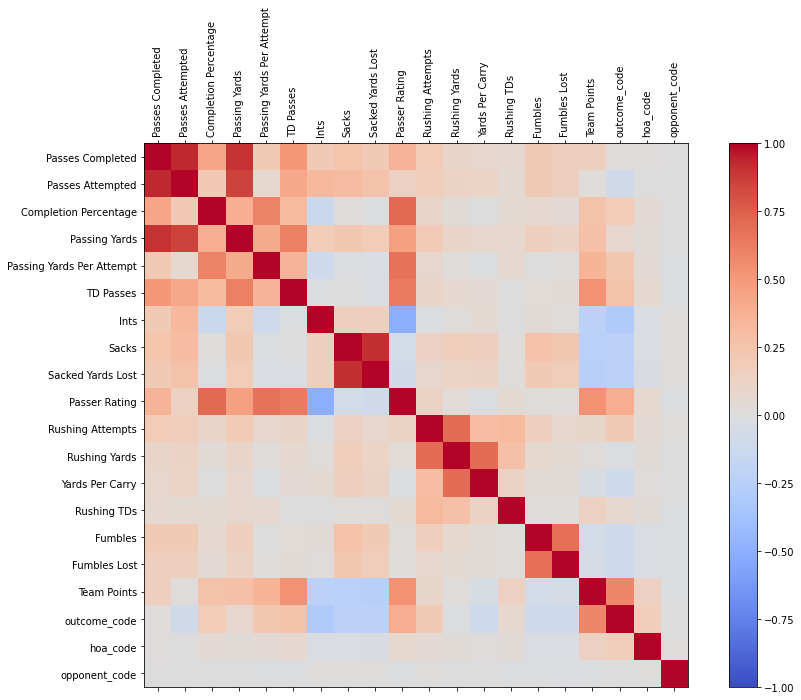

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = qbs_num
corr = data.corr()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

Creating decision tree classifier

In [36]:
qbs_num.columns

Index(['Passes Completed', 'Passes Attempted', 'Completion Percentage',
       'Passing Yards', 'Passing Yards Per Attempt', 'TD Passes', 'Ints',
       'Sacks', 'Sacked Yards Lost', 'Passer Rating', 'Rushing Attempts',
       'Rushing Yards', 'Yards Per Carry', 'Rushing TDs', 'Fumbles',
       'Fumbles Lost', 'Team Points', 'outcome_code', 'hoa_code',
       'opponent_code'],
      dtype='object')

In [37]:
X = qbs_num.drop('outcome_code', axis = 1)
Y = qbs_num.outcome_code

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

1.0


In [42]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.7505820721769499


In [43]:
df = X_test.copy()
df['Actual'] = Y_test
df['Prediction'] = predictions
df

Passes Completed  Passes Attempted  Completion Percentage  \
3870               23.0              31.0                   74.2   
5229               17.0              24.0                   70.8   
10639              23.0              35.0                   65.7   
35028              24.0              35.0                   68.6   
39379              10.0              19.0                   52.6   
...                 ...               ...                    ...   
4757               27.0              35.0                   77.1   
39325              20.0              32.0                   62.5   
39354              12.0              23.0                   52.2   
20025               9.0              17.0                   52.9   
19430              28.0              40.0                   70.0   

       Passing Yards  Passing Yards Per Attempt  TD Passes  Ints  Sacks  \
3870           227.0                        7.3        1.0   1.0    1.0   
5229           284.0                       11.8        3.0   1.0    2.0   
10639          292.0                        8.3        2.0   0.0    1.0   
35028          266.0                        7.6        2.0   2.0    2.0   
39379           84.0                        4.4        1.0   0.0    3.0   
...              ...                        ...        ...   ...    ...   
4757           260.0                        7.4        1.0   0.0    4.0   
39325          137.0                        4.3        0.0   0.0    1.0   
39354          144.0                        6.3        1.0   0.0    1.0   
20025          129.0                        7.6        1.0   1.0    2.0   
19430          290.0                        7.3        2.0   3.0    1.0   

       Sacked Yards Lost  Passer Rating  ...  Rushing Yards  Yards Per Carry  \
3870                 4.0           91.7  ...            4.0              4.0   
5229                14.0          132.6  ...           64.0              9.1   
10639                7.0          110.7  ...           13.0              3.3   
35028               20.0           86.1  ...            5.0              1.7   
39379               23.0           81.9  ...            0.0              0.0   
...                  ...            ...  ...            ...              ...   
4757                30.0          106.8  ...            0.0              0.0   
39325                7.0           72.0  ...           11.0              3.7   
39354               11.0           86.1  ...            0.0              0.0   
20025                8.0           72.9  ...           46.0              6.6   
19430                5.0           76.0  ...           -1.0             -1.0   

       Rushing TDs  Fumbles  Fumbles Lost  Team Points  hoa_code  \
3870           0.0      0.0           0.0           20         0   
5229           0.0      0.0           0.0           28         1   
10639          0.0      0.0           0.0           43         1   
35028          0.0      0.0           0.0           17         1   
39379          0.0      0.0           0.0           13         0   
...            ...      ...           ...          ...       ...   
4757           0.0      4.0           1.0           10         0   
39325          1.0      0.0           0.0           20         1   
39354          0.0      0.0           0.0           33         1   
20025          0.0      2.0           0.0           17         1   
19430          0.0      0.0           0.0           28         1   

       opponent_code  Actual  Prediction  
3870               2       0           2  
5229               9       2           0  
10639              8       2           2  
35028             12       0           0  
39379             31       2           2  
...              ...     ...         ...  
4757              22       0           0  
39325             27       2           2  
39354             36       2           2  
20025             17       2           0  
19430             19       2          

In [44]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))

Feature: 1, Score: 0.02585
Feature: 2, Score: 0.07878
Feature: 3, Score: 0.04456
Feature: 4, Score: 0.04417
Feature: 5, Score: 0.03805
Feature: 6, Score: 0.01258
Feature: 7, Score: 0.02075
Feature: 8, Score: 0.01631
Feature: 9, Score: 0.04014
Feature: 10, Score: 0.06016
Feature: 11, Score: 0.03939
Feature: 12, Score: 0.04821
Feature: 13, Score: 0.05542
Feature: 14, Score: 0.00323
Feature: 15, Score: 0.01195
Feature: 16, Score: 0.00477
Feature: 17, Score: 0.39447
Feature: 18, Score: 0.01155
Feature: 19, Score: 0.04966


In [45]:
columns = list(X.columns)
for i, col in enumerate(columns):
    print('Feature: %0d, %s' % (i+1, col))

Feature: 1, Passes Completed
Feature: 2, Passes Attempted
Feature: 3, Completion Percentage
Feature: 4, Passing Yards
Feature: 5, Passing Yards Per Attempt
Feature: 6, TD Passes
Feature: 7, Ints
Feature: 8, Sacks
Feature: 9, Sacked Yards Lost
Feature: 10, Passer Rating
Feature: 11, Rushing Attempts
Feature: 12, Rushing Yards
Feature: 13, Yards Per Carry
Feature: 14, Rushing TDs
Feature: 15, Fumbles
Feature: 16, Fumbles Lost
Feature: 17, Team Points
Feature: 18, hoa_code
Feature: 19, opponent_code


In [46]:
X_train.shape, X_test.shape

((13743, 19), (3436, 19))

New model excluding the team points variable

In [48]:
X = X.drop('Team Points', axis = 1)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

0.998253656406898


In [52]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.6781140861466822


In [53]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))

Feature: 1, Score: 0.04088
Feature: 2, Score: 0.06800
Feature: 3, Score: 0.06292
Feature: 4, Score: 0.07312
Feature: 5, Score: 0.06753
Feature: 6, Score: 0.01546
Feature: 7, Score: 0.01944
Feature: 8, Score: 0.02942
Feature: 9, Score: 0.07283
Feature: 10, Score: 0.23335
Feature: 11, Score: 0.05247
Feature: 12, Score: 0.08311
Feature: 13, Score: 0.05682
Feature: 14, Score: 0.00343
Feature: 15, Score: 0.01270
Feature: 16, Score: 0.01303
Feature: 17, Score: 0.01828
Feature: 18, Score: 0.07719


In [54]:
columns = list(X.columns)
for i, col in enumerate(columns):
    print('Feature: %0d, %s' % (i+1, col))

Feature: 1, Passes Completed
Feature: 2, Passes Attempted
Feature: 3, Completion Percentage
Feature: 4, Passing Yards
Feature: 5, Passing Yards Per Attempt
Feature: 6, TD Passes
Feature: 7, Ints
Feature: 8, Sacks
Feature: 9, Sacked Yards Lost
Feature: 10, Passer Rating
Feature: 11, Rushing Attempts
Feature: 12, Rushing Yards
Feature: 13, Yards Per Carry
Feature: 14, Rushing TDs
Feature: 15, Fumbles
Feature: 16, Fumbles Lost
Feature: 17, hoa_code
Feature: 18, opponent_code


In [55]:
X = qbs_num.drop('outcome_code', axis = 1)
Y = qbs_num.outcome_code

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\goodw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

0.8234737684639453


In [59]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8090803259604191


In [60]:
model.decision_function(X)

array([-4.30939907, -0.98530939, -2.12051968, ..., -2.79816452,
       -2.63219525, -2.23602017])

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, predictions)
confusion_matrix

array([[1467,  323],
       [ 333, 1313]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82      1790\n           2       0.80      0.80      0.80      1646\n\n    accuracy                           0.81      3436\n   macro avg       0.81      0.81      0.81      3436\nweighted avg       0.81      0.81      0.81      3436\n'

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

0.765189551044168


In [69]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.7505820721769499


In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

0.8341701229716947


In [86]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.7587310826542492


In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [79]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

C:\Users\goodw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

0.9900312886560431


In [81]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8023864959254947


In [82]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Team Points                  0.274760
Passer Rating                0.099016
Passing Yards                0.059659
Passes Attempted             0.056561
Passing Yards Per Attempt    0.055369
Yards Per Carry              0.052724
Rushing Yards                0.052182
Sacked Yards Lost            0.051952
Completion Percentage        0.050599
Rushing Attempts             0.047361
opponent_code                0.045367
Ints                         0.038766
Passes Completed             0.036817
Sacks                        0.025220
TD Passes                    0.017387
hoa_code                     0.015415
Fumbles                      0.009665
Fumbles Lost                 0.006900
Rushing TDs                  0.004280
dtype: float64

No handles with labels found to put in legend.


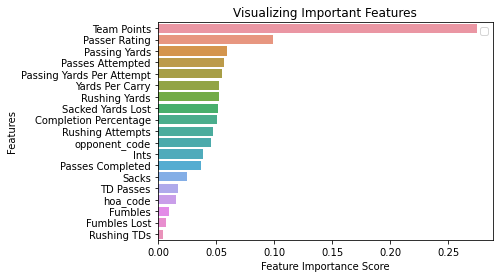

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [87]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()

In [88]:
model.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

0.6965728006985374


In [90]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.6731664726426076


In [91]:
from sklearn.svm import SVC

In [92]:
model = SVC()

In [93]:
model.fit(X_train, Y_train)

C:\Users\goodw\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

0.9989812995706905


In [95]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.539289871944121
